In this implementation, we will use numbers 1-6 which will represent colors that are used in the actual game.

The calculate_score function returns the score of any given guess to the answer that is the solution. In the real game, this is what is known as hints that the codemaker provides to the codebreaker after each attempted guess.
In the hint, the letter 'B' suggests that there is a digit (1-6) in the guess that is in the right position (compared to the solution). The letter 'W' suggests that there is a digit in the guess that also appears in the solution, but it is placed in the wrong position. For example, given a solution '1234' and the guess '5213' the function will return 'BWW' since the digit 2 is at the right place, and digits 1 and 3 appear in the solution, but at a different position.

In [1]:
def calculate_score(guess, answer):
  score = ''
  wrong_guess_pegs, wrong_answer_pegs = [], []
  for i in range(4):
    if guess[i] == answer[i]:
      score += 'B'
    else:
      wrong_guess_pegs.append(guess[i])
      wrong_answer_pegs.append(answer[i])
  for i in range(len(wrong_guess_pegs)):
    if wrong_answer_pegs.count(wrong_guess_pegs[i]) > 0:
      score += 'W'
      wrong_answer_pegs.remove(wrong_guess_pegs[i])
  return score

In the cell below is a demonstration of how the function works. You can try with any two 4-digit combinations of numbers between 1-6 and the hint will be displayed.

In [ ]:
calculate_score('1234', '5213')

In the cell below, the all_possible_answers list represents all possible answers in the game, which are the 4-digit combinations of numbers 1-6. Since there are 6 digits and 4 positions, all_possible_answers will contatin 6^4 combinations, that is 1296 elements. We will fill the list with 4 for loops as in the function below. On the other hand, all_possible_scores dictionary will represent the score between each two possible guesses. It will be implemented as a key-value pair in which the key will be the first guess, and the value will again be a dictionary, in which the key will be another guess and the value will be the score between those two guesses.
We will cast the list all_possible_answers into a set so that we can get an element from that set faster. <br>
**You need to run this cell before start of each new game!** It may take a few seconds to execute this cell. <br>
For other cells, it is enough to run them just once in the beginning.

In [2]:
all_possible_answers = []
all_possible_scores = {}
def initialize():  
  global all_possible_answers
  for i in range(1,7):
    for j in range(1,7):
      for k in range(1,7):
        for l in range(1,7):
          all_possible_answers.append(str(i)+str(j)+str(k)+str(l))
  
  for guess in all_possible_answers:
    all_possible_scores[guess] = {}
    for answer in all_possible_answers:    
      all_possible_scores[guess][answer] = (calculate_score(guess, answer))

  all_possible_answers = set(all_possible_answers)
  
# information we need to build up so that we can use the minimax - that information will be stored in the dictionary
# basically what we do is build a map with all the possible guesses and all the possible answers and evaluate the score between them
# we have to run this cell before each start of the game

initialize()
possible_answers = all_possible_answers.copy()
possible_scores = all_possible_scores.copy()
noOfGuesses = 0
score = ''
guess = ''

The cell below will be our minimax function with which the program will create a new attempted guess. <br>
 In the first part of the function (until the first comment) we create a dictionary that as a key contains all possible scores (there are 14 of them) and set their values to 0. At the end of the function we will fill the values of all scores in the dictionary and the the guess with the greatest value will be important to us. <br>
Now. let's move on to the key part of the function. First of all, if the program is making the first guess, then that guess will be '3344'. It could have been any pair of digits in the order 'AABB' since that is proven to be the most efficient. For proof, check out the screenshot table further below. <br> If this is not the first guess, then based on the score that we received from our previous guess, we eliminate all impossible guesses from our possible_answers set and our possible_scores dictionary. This is the minimizing part. <br>
On the other hand, the maximizing player (the codemaker) returns the guess that has the most possible solutions possible after that guess. In other words, it returns the guess that will result with the minimal possible information for the codebreaker.

In [ ]:
def make_guess():
  global score
  global guess
  max = 0
  maxScore = ''
  maxGuess = ''

  all_scores_only = []
  scores_dict = {}
  for sc in possible_scores.values():       
    for scor in sc.values():
      all_scores_only.append(scor)

  all_scores_only = set(all_scores_only)
  for sc in all_scores_only:
    scores_dict[sc] = 0                     # now we have a dictionary with all possible scores set to 0
  
  if noOfGuesses > 0:
    for answer in possible_answers.copy():
      if possible_scores[guess][answer] != score:
        possible_answers.remove(answer)     # we are keeping only the possible answers in our set

    for ps in possible_scores.copy().keys():   
      for answer in possible_scores[ps].copy().keys():
        if answer not in possible_answers:
          del possible_scores[ps][answer]    # same here, keeping only possible answers in the dictionary

    for val in possible_scores.values():
      for sc in val:
        scores_dict[val[sc]] += 1
        if scores_dict[val[sc]] > max:      
          max = scores_dict[val[sc]]
          maxScore = val[sc]
          maxGuess = sc

    return maxGuess                         # the maximizing player returns the guess that has the most possible solutions
  else:
    return '3344'

The function play() below is simply an implementation of the game structure, this is how we will play the game against the program(codebreaker).

In [ ]:
def play():
  global noOfGuesses
  global guess
  global score
  while 1:
    finalAnswer = input('Enter your 4-digit code of {1,2,3,4,5,6} elements: ')
    valid = 1
    finalAnswerString = str(finalAnswer)
    if len(finalAnswerString) != 4:
      print('Please enter a valid code with length 4!')
      continue
    for i in finalAnswerString:
      if i == '1' or i == '2' or i == '3' or i == '4' or i == '5' or i == '6':
        continue
      else:
        valid = 0
        print('"' + str(i) + '"' + ' is not a valid character for the code. Please enter a valid code!')
        break
    if valid == 1:
      break

  while noOfGuesses < 10:
    guess = make_guess()
    print('Guess is: ' + guess)
    if guess in all_possible_answers: #checks if the guess is a valid one
      noOfGuesses += 1
      score = calculate_score(guess, finalAnswer)
      print('The hint is: ' + score)
      if score == 'BBBB':
        print('You have cracked the code ' + guess + ' in ' + str(noOfGuesses) + ' guesses!')
        break
    else:
      print(guess + ' is not a valid guess.')
  if noOfGuesses == 10 and score != 'BBBB':
    print('You have not cracked the code. The right code was: ' + finalAnswer)

Run the cell below to start the game each time. Good luck with the game(although the codemaker will lose every single time :) ) <br>
Remember to **run the cell with initialize() before start of every game**. Otherwise, the program will not work.

In [ ]:
play()

With this display of the game, we end the first part of the file and we continue with the second part, which will be the traversal through a tree to find a solution.

<hr>

Now, let's move on to state space search, in which we will use A star search.
Again, we have to **run the cell with initialize()** function before we move on in order for everything to work properly, but now we do it only once and that is it.

In [3]:
import graphviz as gv

Below is our heuristic. We will evaluate the score and give it value of 1 for each 'W' in the score, and give it a value of 2 for each 'B' in the score.

In [ ]:
# we will give a numbered score to each possible feedback with 'W' valued as 1 and 'B' valued as 2
all_scores_only = []
scores_feedback = {}
for sc in all_possible_scores.values():       
  for scor in sc.values():
    all_scores_only.append(scor)
    scores_feedback[scor] = 0
    for char in scor:
      if char == 'W':
        scores_feedback[scor] += 1
      elif char == 'B':
        scores_feedback[scor] += 2

scores_feedback

The array below contains all possible numbers (colors) that are used in the game of Mastermind.

In [5]:
# we will use this array for expanding the tree
colors = ['1', '2', '3', '4', '5', '6']

In [ ]:
finalAnswer = input('Enter your 4-digit code of {1,2,3,4,5,6} elements: ')

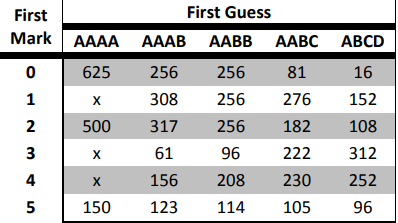
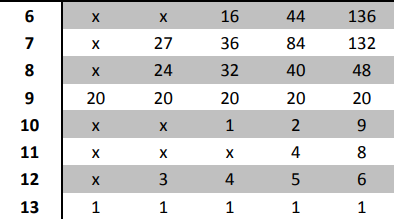

We see that AABB in the worst case has the least possible solutions so we decide to go with that as our first choice. Let's evaluate the possibilities '1122', '3344' and '5566' and the choice with the highest score will be the root of our tree. In the picture above, letters A,B,C,D represent different colors.

In [ ]:
print(str(scores_feedback[all_possible_scores[finalAnswer]['1122']]) + ' = ' + all_possible_scores[finalAnswer]['1122'])
print(str(scores_feedback[all_possible_scores[finalAnswer]['3344']]) + ' = ' + all_possible_scores[finalAnswer]['3344'])
print(str(scores_feedback[all_possible_scores[finalAnswer]['5566']]) + ' = ' + all_possible_scores[finalAnswer]['5566'])

If any value of the feedback is 2, we need to check if the score is 'WW' because then we know that by reversing the order of our guess we get a value of 4 which might be the highest score then.

In [ ]:
firstGuesses = ['1122', '3344', '5566']
maxScore = 0
guessChoice = ''
for g in firstGuesses:
  if all_possible_scores[finalAnswer][g] == 'WW':
    g = g.replace(g[0], '%temp%').replace(g[2], g[0]).replace('%temp%', g[2])

  if scores_feedback[all_possible_scores[finalAnswer][g]] > maxScore:
    maxScore = scores_feedback[all_possible_scores[finalAnswer][g]]
    guessChoice = g

print(guessChoice)
print(maxScore)
ms = maxScore

We have two different ways that we will be expanding the tree. One is by checking all possible positions, for example '1122' will be expanded to '2122', '1222', '1112' and '1121'. We will expand on that node for which the score of the guess in the node will be greater or equal to the score of the guess in the parent node. If the score in the child node is greater than the score in the parent node, we will repeat expansion of the tree by all positions. If it is equal, we will move on to the second way of expansion.

The other is by checking all possible colors in one position, for example again '1122' in the 1st position will be expanded to '2122', '3122', '4122', '5122' and '6122'.
We will expand on that node for which the score of the guess in the node will be strictly greater to the score of the guess in the parent node.

We create a graph and add root node to it.

In [33]:
graph = gv.Digraph(comment="Mastermind")
graph.node('root', guessChoice)

The below function is for the special case when our hint(score) returns a 'BBWW' beacue the algorithm can fail to find a solution once it reaches that hint. To avoid that, we stop the algoritm then and expand on that node with all permutations of the combination and store them in the children nodes. We know that one of them will be our wanted solution.

In [10]:
def find_solution_for_score_BBWW(guess, depth, p):
  print('We go into our function for score BBWW.')
  childNo = 0
  for i in range(3):
    for j in range(i+1,4):
      s = guess
      s = list(s)
      temp = s[i]
      s[i] = s[j]
      s[j] = temp
      s = ''.join(s)
      childNo += 1
      graph.node('child %s, %s' %(depth + 1, childNo), s)
      if depth == 1:
        graph.edge('root', 'child %s, %s' %(depth + 1, childNo))
      else:
        graph.edge('child %s, %s' %(depth, p), 'child %s, %s' %(depth + 1, childNo))
      if scores_feedback[all_possible_scores[finalAnswer][s]] == 8:
        print('Solution: ' + s)
        return
      

Now that we have our graph and the root, we start expanding first by all positions, and then by all colors in a position alternately as discussed above. In the end, we get a graph with the path from the root (the first guess) to the solution (the last guess with the score 'BBBB').

In [ ]:
maxScore = ms
depth = 1
p = 0
secondGuess = guessChoice
print('The root is: ' + guessChoice)
while 1:
  if all_possible_scores[finalAnswer][guessChoice] == 'BBWW': # only for the root
    find_solution_for_score_BBWW(guessChoice, depth, p+1)
    break
  position = 0
  firstGuess = ''
  check = 0
  for pos in range(4):
    newFirstGuess = ''
    i = 0
    while i < pos:
      newFirstGuess += secondGuess[i]
      i += 1
    if secondGuess[pos] == colors[0]:
      newFirstGuess += colors[1]
    else:
      newFirstGuess += colors[0]
    i += 1
    while i < 4:
      newFirstGuess += secondGuess[i]
      i += 1
    
    graph.node('child %s, %s' % (depth, pos+1), newFirstGuess)
    if depth == 1:
      graph.edge('root', 'child 1, %s' % str(pos+1))
    else:
      graph.edge('child %s, %s' % (depth-1, p), 'child %s, %s' % (depth, pos+1))

    if scores_feedback[all_possible_scores[finalAnswer][newFirstGuess]] >= maxScore:
      if scores_feedback[all_possible_scores[finalAnswer][newFirstGuess]] > maxScore:
        check = 1
      maxScore = scores_feedback[all_possible_scores[finalAnswer][newFirstGuess]]
      position = pos
      firstGuess = newFirstGuess
  
  print('Expanding by position to the node: ' + firstGuess + ' and the maxScore is: ' + str(maxScore))

  if all_possible_scores[finalAnswer][firstGuess] == 'BBWW':
    find_solution_for_score_BBWW(firstGuess, depth, p)
    break

  if firstGuess == finalAnswer:
    print('Solution: ' + firstGuess)
    break
  
  if check == 1:
    secondGuess = firstGuess
    depth += 1
    p = position + 1
    continue
  
  p = 0
  depth += 1
  # now, let's expand all posible colors on the position.
  secondGuess = ''
  wantedColor = ''
  for color in colors:
    if color == firstGuess[position]:
      continue
    newSecondGuess = ''
    for i in range(4):       # this for loop is only for generating newSecondGuess
      if i != position:
        newSecondGuess += firstGuess[i]
      else: 
        newSecondGuess += color

    p += 1
    graph.node('child %s, %s' % (depth, p), newSecondGuess)
    graph.edge('child %s, %s' % (depth - 1, position+1), 'child %s, %s' % (depth, p))
    
    if scores_feedback[all_possible_scores[finalAnswer][newSecondGuess]] > maxScore:
      maxScore = scores_feedback[all_possible_scores[finalAnswer][newSecondGuess]]
      secondGuess = newSecondGuess
      break
  
  print('Expanding by the color to the node: ' + secondGuess + ' and the maxScore is: ' + str(maxScore))

  if all_possible_scores[finalAnswer][secondGuess] == 'BBWW':
    find_solution_for_score_BBWW(secondGuess, depth, p)
    break

  if secondGuess == finalAnswer:
    print('Solution: ' + secondGuess)
    break
  depth += 1
graph

<hr>

References: <br>
https://www.youtube.com/watch?v=Okm_t5T1PiA&ab_channel=Confreaks for the simulation of the mastermind game.

https://informatika.stei.itb.ac.id/~rinaldi.munir/Stmik/2009-2010/Makalah2009/MakalahIF3051-2009-026.pdf for the traversal of the tree to find a solution.

Author: <br>
Fran Zvonimir Zgombić <br>
franzg2401@gmail.com